# Collector Overview

In [3]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [5]:
def load_data(file_name, usecols=None):
    cnames = ["dump-type","elem-type","record-ts","project","collector", "peer-asn","peer-ip",
              "prefix","next-hop-ip","as-path", "origin-as","communities","old-state","new-state"]
    load_config = {
        "sep":"|",
        "engine":'c',
        "header":None,
        "names":cnames,
        "index_col":False,
        "usecols":usecols,
    }
    df = pd.read_csv(file_name, **load_config)
    if "record-ts" in df.columns:
        df["record-ts"] = pd.to_datetime(df["record-ts"], unit="s")
    if "origin-as" in df.columns:
        df["origin-as"] = pd.to_numeric(df["origin-as"], errors="coerce")
    return df

In [6]:
df = load_data("shared-data/fub/assignment2/ribs.1556755200.csv.gz",
                    usecols=["prefix", "origin-as", "collector"]).dropna().drop_duplicates()



/tmp/ipykernel_2859459/3200875616.py:1: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_data("shared-data/fub/assignment2/ribs.1556755200.csv.gz",


In [7]:
counts = df['collector'].value_counts()

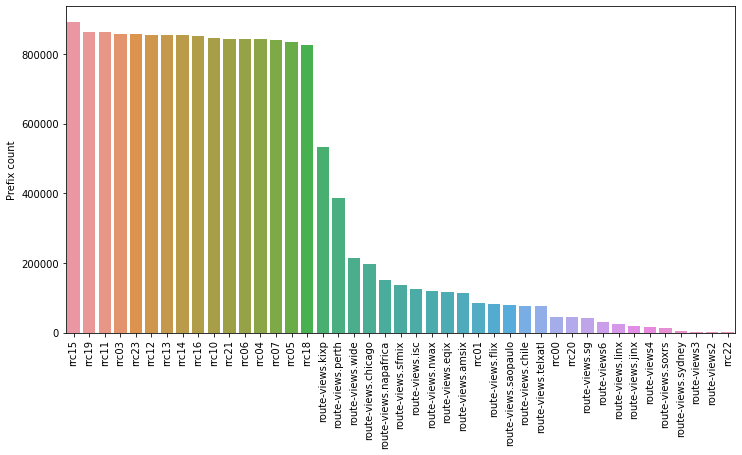

In [27]:
plt.rcParams["figure.figsize"] = [12.00, 6.00]
g = sns.barplot(x=counts.index, y=counts.values);
g.set(ylabel='Prefix count')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [26]:
len(counts)

43

In [29]:
print(df['collector'].unique())

['route-views.perth' 'route-views.sg' 'route-views.sfmix'
 'route-views.soxrs' 'route-views.nwax' 'rrc16' 'rrc13' 'rrc14' 'rrc15'
 'route-views.chicago' 'rrc18' 'route-views.chile' 'rrc22' 'rrc23'
 'route-views.amsix' 'route-views.flix' 'route-views.napafrica' 'rrc19'
 'rrc20' 'rrc21' 'rrc12' 'rrc11' 'route-views.kixp' 'route-views.jinx'
 'route-views.linx' 'route-views.telxatl' 'route-views.isc'
 'route-views.eqix' 'route-views3' 'route-views4' 'route-views6'
 'route-views.wide' 'route-views.sydney' 'rrc05' 'rrc06' 'rrc07' 'rrc10'
 'rrc04' 'rrc03' 'route-views.saopaulo' 'rrc00' 'rrc01' 'route-views2']
